In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

pip install imblearn

In [2]:
cpdf= pd.read_csv("cpdf_final.csv")

In [3]:
cpdf.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,num_years_antig,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,0,...,3,43.648,1,01-01-2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,0,...,3,43.648,1,01-02-2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389


In [4]:
cpdf.shape

(175149, 31)

In [5]:
cpdf.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [6]:
cpdf.isnull().sum().sum()

0

In [7]:
cpdf.duplicated().sum().sum()

0

No Missing data. No Duplicate data. 

In [8]:
cpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   cons_12m                        175149 non-null  int64  
 2   cons_gas_12m                    175149 non-null  int64  
 3   cons_last_month                 175149 non-null  int64  
 4   date_activ                      175149 non-null  object 
 5   date_end                        175149 non-null  object 
 6   date_modif_prod                 175149 non-null  object 
 7   date_renewal                    175149 non-null  object 
 8   forecast_cons_12m               175149 non-null  float64
 9   forecast_cons_year              175149 non-null  int64  
 10  forecast_discount_energy        175149 non-null  int64  
 11  forecast_meter_rent_12m         175149 non-null  float64
 12  forecast_price_e

In [9]:
date = ["date_activ","date_end","date_modif_prod","date_renewal","price_date"]

In [10]:
for i in date:
    cpdf[i] = pd.to_datetime(cpdf[i])

C:\Users\honey\AppData\Local\Temp\ipykernel_28376\3668732214.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpdf[i] = pd.to_datetime(cpdf[i])
C:\Users\honey\AppData\Local\Temp\ipykernel_28376\3668732214.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpdf[i] = pd.to_datetime(cpdf[i])
C:\Users\honey\AppData\Local\Temp\ipykernel_28376\3668732214.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpdf[i] = pd.to_datetime(cpdf[i])
C:\Users\honey\AppData\Local\Temp\ipykernel_28376\3668732214.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when d

Converting data types for any categorical variables.

In [12]:
#For the column has_gas, replace t for 1 and f for 0
cpdf['has_gas']=cpdf['has_gas'].replace(['t','f'],[1,0])

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
cpdf.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.0,0,0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.0,0,0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,2015-01-02,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389


In [15]:
cpdf.has_gas.value_counts()

0    143364
1     31785
Name: has_gas, dtype: int64

Converted data types where necesary. 

Managing Outliers. 

In [16]:
cpdf.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [17]:
date= ["date_activ", "date_end", "date_modif_prod", "date_renewal", "price_date"]
Consumption = ["cons_12m", "cons_gas_12m", "cons_last_month"]
Forecast = ["forecast_cons_12m","forecast_cons_year", "forecast_discount_energy","forecast_meter_rent_12m", "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]
Margin = ["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]
Price =["price_off_peak_var", "price_peak_var", "price_mid_peak_var","price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"]
Misc = ["imp_cons", "nb_prod_act", "num_years_antig","pow_max"]

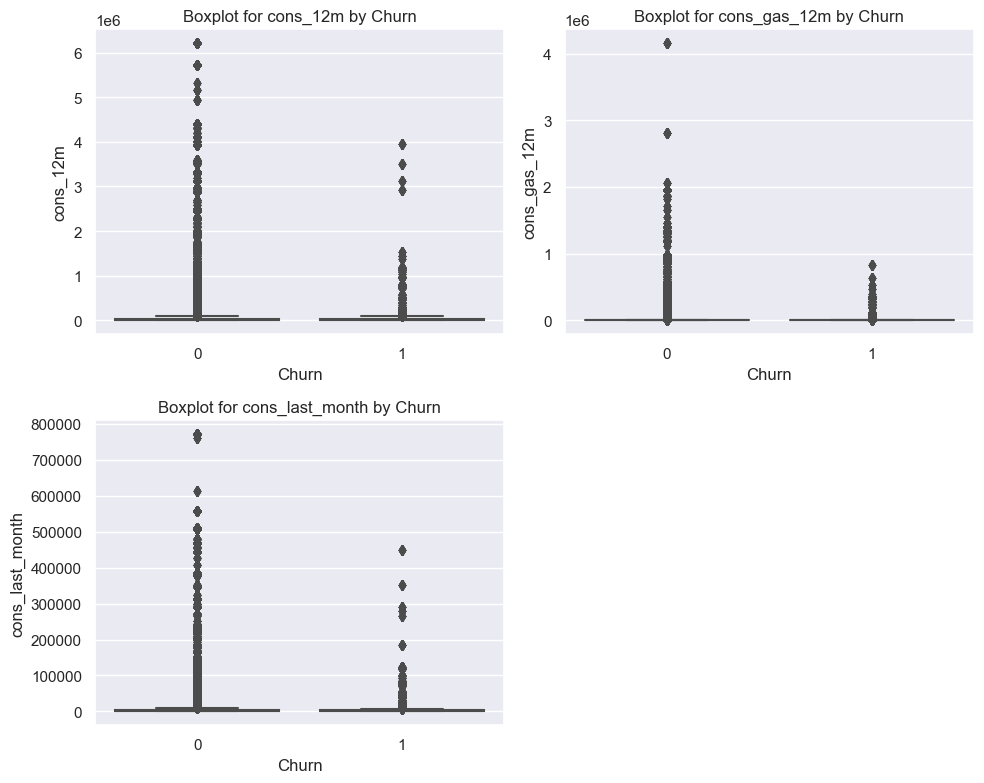

In [18]:
# Create a figure for the entire set of boxplots
plt.figure(figsize=(10, 8))
# Create a boxplot for each column in the Consumption list
for i, column in enumerate(Consumption):
    plt.subplot(2, 2, i + 1)  # Create subplots for each column
    sns.boxplot(data=cpdf, x=cpdf['churn'], y=column)
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)

plt.tight_layout()
plt.show();

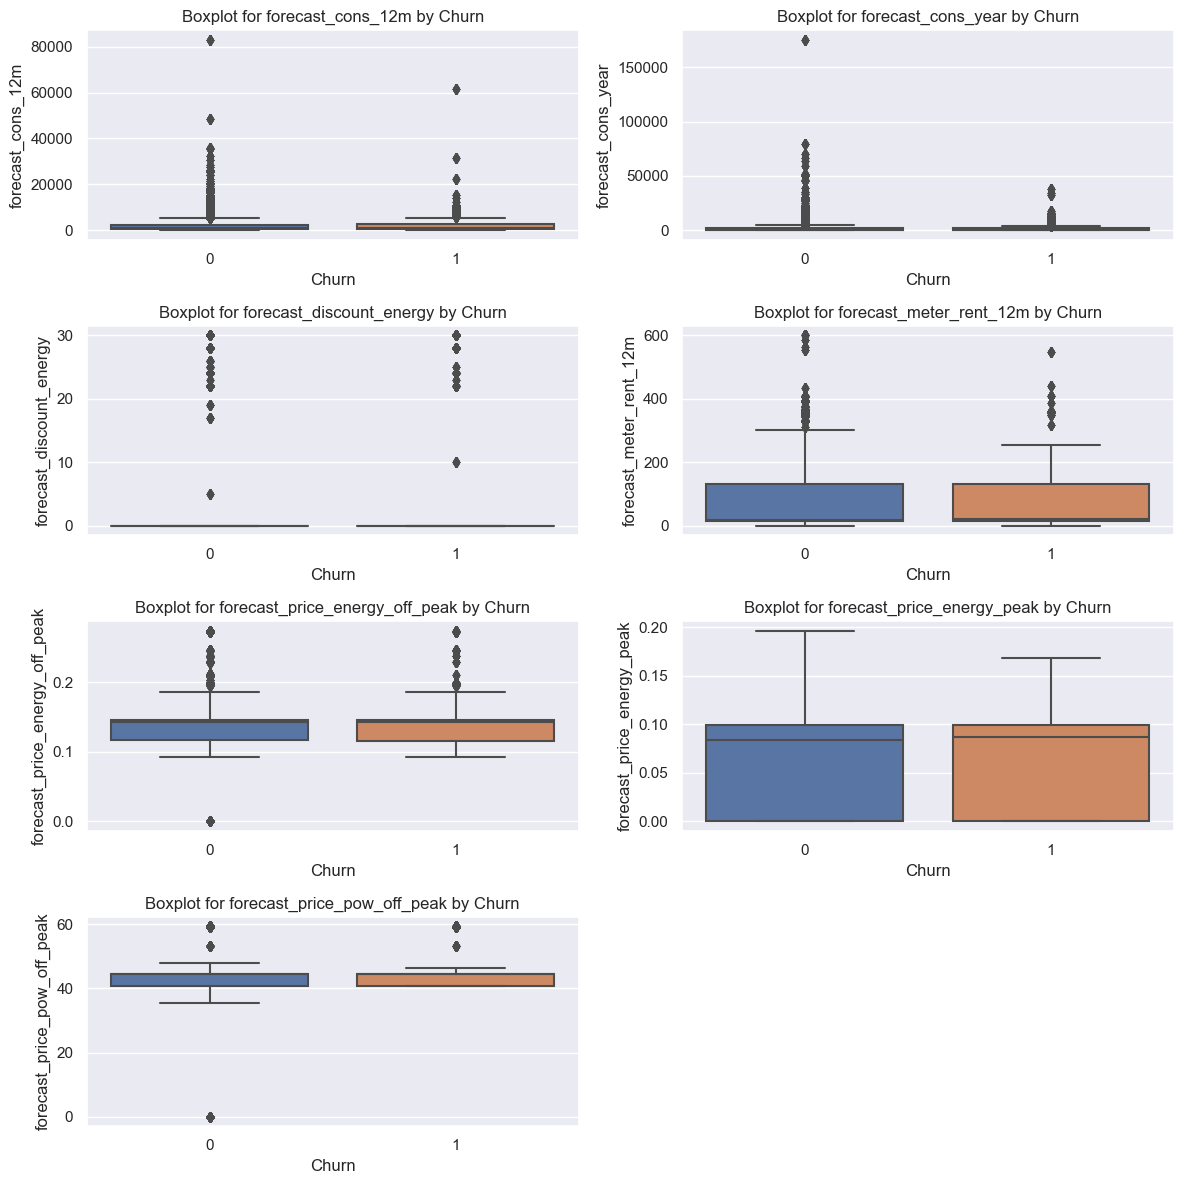

In [19]:
Forecast = ["forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy",
            "forecast_meter_rent_12m", "forecast_price_energy_off_peak",
            "forecast_price_energy_peak", "forecast_price_pow_off_peak"]
# Create a figure for the entire set of boxplots
plt.figure(figsize=(12, 12))
# Create a boxplot for each column in the Forecast list
for i, column in enumerate(Forecast):
    plt.subplot(4, 2, i + 1)  # Create subplots for each column
    sns.boxplot(data=cpdf, x=cpdf['churn'], y=column)
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
plt.tight_layout()
plt.show();

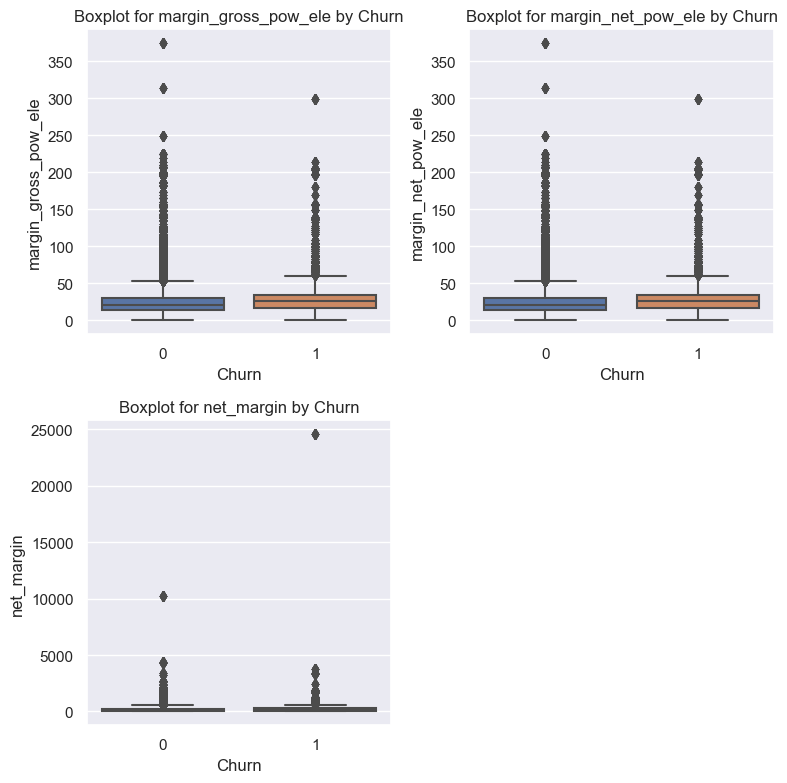

In [20]:
# Create a figure for the entire set of boxplots
plt.figure(figsize=(8, 8))
# Create a boxplot for each column in the Forecast list
for i, column in enumerate(Margin):
    plt.subplot(2, 2, i + 1)  # Create subplots for each column
    sns.boxplot(data=cpdf, x=cpdf['churn'], y=column)
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
plt.tight_layout()
plt.show();

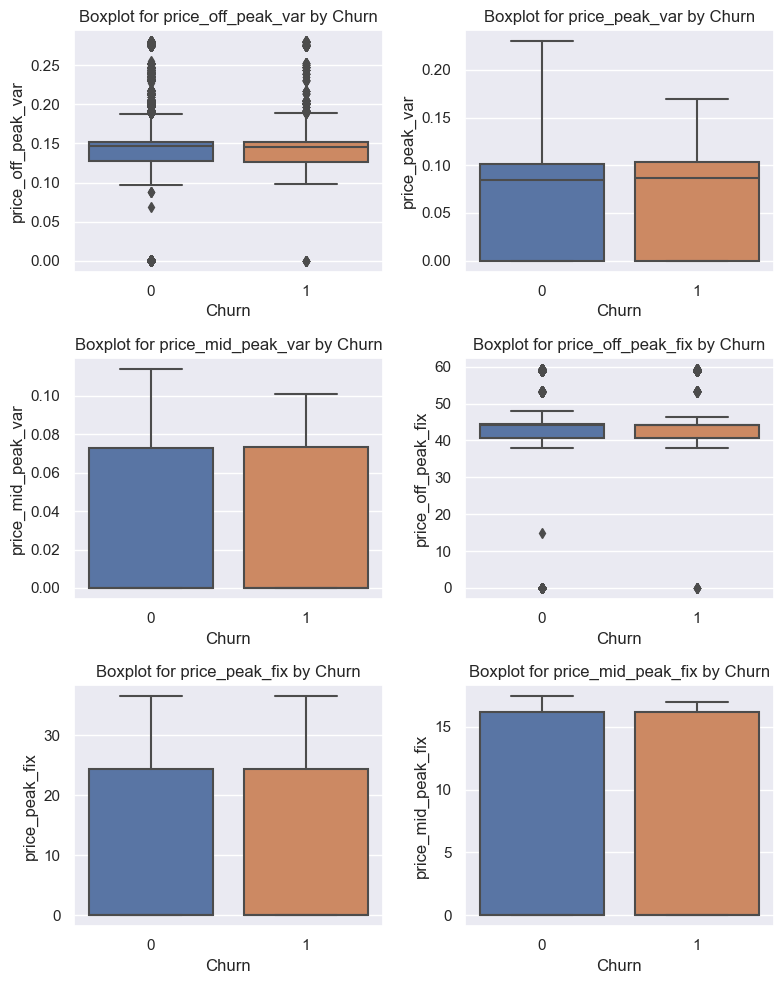

In [21]:
# Create a figure for the entire set of boxplots
plt.figure(figsize=(8, 10))
# Create a boxplot for each column in the Forecast list
for i, column in enumerate(Price):
    plt.subplot(3, 2, i + 1)  # Create subplots for each column
    sns.boxplot(data=cpdf, x=cpdf['churn'], y=column)
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
plt.tight_layout()
plt.show();

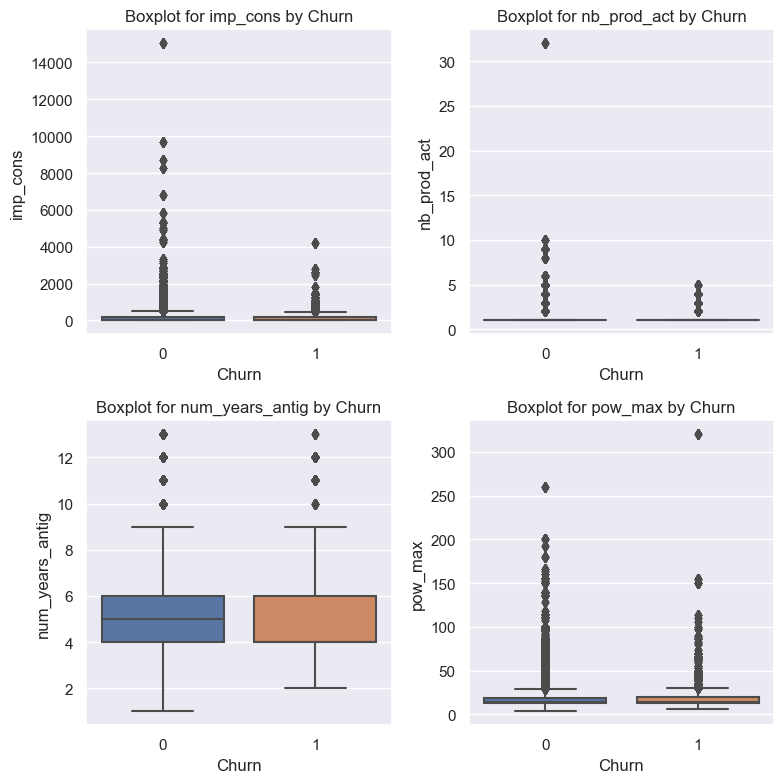

In [22]:
# Create a figure for the entire set of boxplots
plt.figure(figsize=(8, 8))
# Create a boxplot for each column in the Forecast list
for i, column in enumerate(Misc):
    plt.subplot(2, 2, i + 1)  # Create subplots for each column
    sns.boxplot(data=cpdf, x=cpdf['churn'], y=column)
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
plt.tight_layout()
plt.show();

As we can see, outliers are present in all columns. We will treat these outliers to normalise the data.

In [23]:
df_X = cpdf.drop(['churn','id'],axis=1)
df_Y = cpdf[['churn','id']]

In [24]:
df_X.shape

(175149, 29)

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in df_X.columns:
    lower_range,upper_range = remove_outlier(df_X[column])
    df_X[column]= np.where(df_X[column]>upper_range, upper_range ,df_X[column])
    df_X[column]= np.where(df_X[column]<lower_range, lower_range ,df_X[column])

In [27]:
updated_cpdf = pd.concat([df_X, df_Y], axis = 1)

In [28]:
updated_cpdf.shape

(175149, 31)

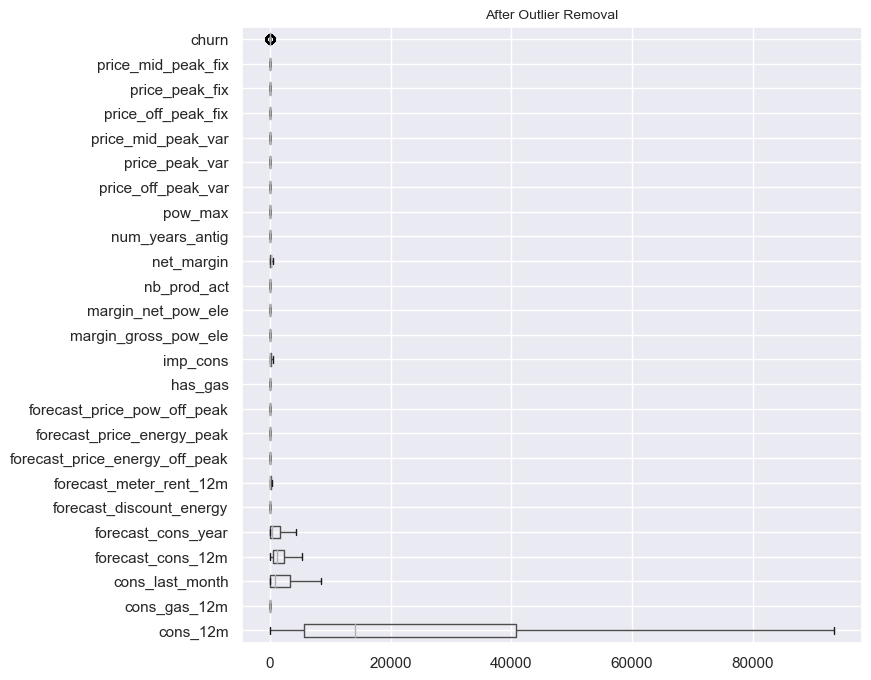

In [29]:
plt.figure(figsize=(8,8))
updated_cpdf.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=10)
plt.show();

As we can see, outliers have been treated in updated_cpdf.

In [30]:
updated_cpdf.churn.value_counts()

0    158146
1     17003
Name: churn, dtype: int64

In [31]:
df_X.shape

(175149, 29)

In [32]:
df_X.duplicated().sum().sum()

24

In [33]:
df_X.drop_duplicates(inplace = True)

In [34]:
df_X.shape

(175125, 29)

In [35]:
df_X.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [36]:
df_X.tail(2)

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
175147,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0.0,0.0,1.07,0.167086,0.088454,45.311378,0.0,0.0,11.84,11.84,1.0,96.34,6.0,10.392,2015-01-11,0.165962,0.086905,0.0,44.26693,0.0,0.0
175148,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0.0,0.0,1.07,0.167086,0.088454,45.311378,0.0,0.0,11.84,11.84,1.0,96.34,6.0,10.392,2015-01-12,0.165962,0.086905,0.0,44.26693,0.0,0.0


In [37]:
df_Y.shape

(175149, 2)

In [38]:
df_Y.duplicated().sum()

160543

In [39]:
df_Y.drop_duplicates(inplace = True)

C:\Users\honey\AppData\Local\Temp\ipykernel_28376\2859940165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y.drop_duplicates(inplace = True)


In [40]:
df_Y.duplicated().sum()

0

In [41]:
df_Y.shape

(14606, 2)

In [42]:
df_X.shape

(175125, 29)

In [43]:
updated_cpdf = pd.concat([df_X, df_Y], axis = 1)

In [45]:
updated_cpdf.duplicated().sum()

0

In [47]:
updated_cpdf.isnull().sum()

cons_12m                               2
cons_gas_12m                           2
cons_last_month                        2
date_activ                             2
date_end                               2
date_modif_prod                        2
date_renewal                           2
forecast_cons_12m                      2
forecast_cons_year                     2
forecast_discount_energy               2
forecast_meter_rent_12m                2
forecast_price_energy_off_peak         2
forecast_price_energy_peak             2
forecast_price_pow_off_peak            2
has_gas                                2
imp_cons                               2
margin_gross_pow_ele                   2
margin_net_pow_ele                     2
nb_prod_act                            2
net_margin                             2
num_years_antig                        2
pow_max                                2
price_date                             2
price_off_peak_var                     2
price_peak_var  

In [48]:
updated_cpdf.dropna(inplace= True)

In [51]:
updated_cpdf.isnull().sum().sum()

0

In [52]:
updated_cpdf = updated_cpdf[['id'] + [col for col in updated_cpdf.columns if col != 'id']]
updated_cpdf.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.0,0.0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,0.0,0.0,25.44,25.44,1.0,531.435,3.0,29.2,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1.0
12,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,0.0,0.0,16.38,16.38,1.0,18.890,6.0,13.8,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0.0


In [53]:
updated_cpdf.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'churn'],
      dtype='object')

In [55]:
updated_cpdf.to_csv("updated_cpdf.csv", index= False)